In [95]:
# imports
from wrangle_zillow import all_2017_zillow_data
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [29]:
# acquiring data
df = all_2017_zillow_data()

In [21]:
# pruning dataset so that only the columns we're interested in remain
zil = df[['bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt', 'logerror', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet']]

In [30]:
# dropping all null values
zil = zil.dropna()

In [31]:
# previewing df
zil.head()

,bathroomcnt,bedroomcnt,taxvaluedollarcnt,logerror,lotsizesquarefeet,calculatedfinishedsquarefeet
0,3.5,4.0,1023282.0,0.025595,4506.0,3100.0
1,1.0,2.0,464000.0,0.055619,12647.0,1465.0
2,2.0,3.0,564778.0,0.005383,8432.0,1243.0
3,3.0,4.0,145143.0,-0.103410,13038.0,2376.0
4,3.0,3.0,119407.0,0.006940,278581.0,1312.0


## Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. 

### Question 1: Are log errors higher for properties with higher than average lot size sqft?

H0: Log error of properties with above avg. lotsizesquarefeet =< Log error of properties with avg. or below avg. lotsizesquarefeet

Ha: Log error of properties with above avg. lotsizesquarefeet > Log error of properties with avg. or below avg. lotsizesquarefeet

In [163]:
# declaring alpha
alpha = .05

# calculating average lotsizesquarefeet value
avglotsize = zil.lotsizesquarefeet.mean()

# creating DFs for properties with greater than avg lot size and those with avg. lot size or smaller
x1 = zil[zil.lotsizesquarefeet > avglotsize].logerror
x2 = zil[zil.lotsizesquarefeet <= avglotsize].logerror

# performing 2 sample, 1 tailed t-test
t, p = stats.ttest_ind(x1, x2)

# printing results
print('alpha:',alpha)
print('t =', t)
print('p =', p/2)

alpha: 0.05
t = -0.4106961517222494
p = 0.34064831033761256


__Takeaway__
- p is greater than alpha so we fail to reject the null hypothesis and we conclude properties with higher than avg. lotsize do not have higher log errors

### Question 2: Is there a linear relationship between bathroom count and logerror?

H0: There is no linear relationship between bathroomcnt and logerror

Ha: There is a linear relationship between bathroomcnt and logerror

In [38]:
# declaring alpha
alpha = .05

# performing pearson r correlation test
corr, p = stats.pearsonr(zil['bathroomcnt'], zil['logerror'])

# printing results
print('alpha:',alpha)
print('r =',corr)
print('p =', p)

alpha: 0.05
r = 0.022103306060146575
p = 6.0544997946818644e-09


__Takeaways__
- p is less than alpha so we reject the null hypothesis and conclude logerror and bathroom count do have a linear relationship.  
- given the very low r value of .02, the relationship is very weak.

### Question 3: What is the relationship between lot square feet and logerror?

No handles with labels found to put in legend.


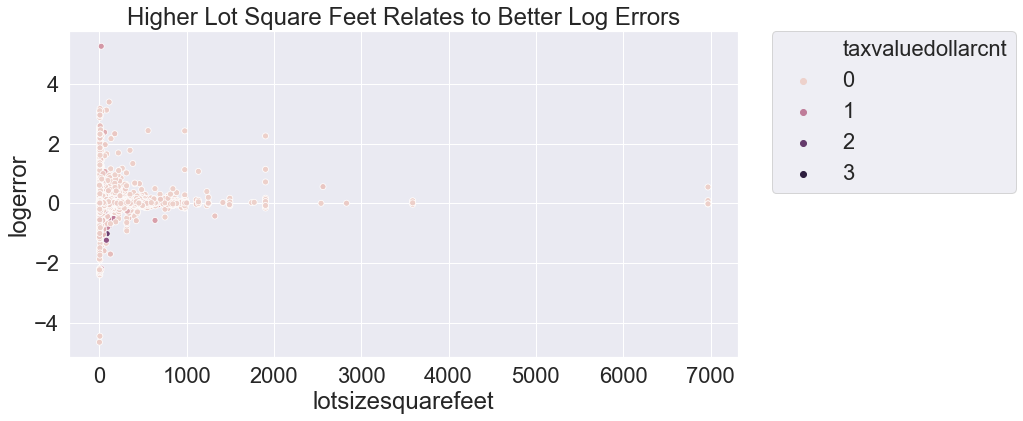

In [86]:
# setting figure size and text size
sns.set(rc = {'figure.figsize':(12,6)})
sns.set(font_scale = 2)

# scaling x axis values for readability
xzil = zil['lotsizesquarefeet'] / 1000

# plotting data, setting title and legend position
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
sns.scatterplot(x = xzil, y = 'logerror', data = zil, hue = 'taxvaluedollarcnt').set_title("Higher Lot Square Feet Relates to Better Log Errors")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- The graph shows that as lotsizesquarefeet increases, the range of log error values decreases while also coming closer to 0
- In other words, properties with lotsizesquarefeet tend to have logerrors closer to 0
- This means that Zillow tends to provide more accurate estimates for properties that are on larger lots.
- The darker the point, the higher the value of property it has
    - Since we're seeing most of the darker points in areas that represent lower lotsizes, we infer that several of the highest value properties have very small lot sizes
        - I can't account for why the legend is displaying such small taxvaluedollarcnt values at this time

### Question 4: What are some notable observations about the relationship between bathroom count and logerror?

Text(0.5, 1.0, 'Log Error Has Large Negative Spikes at Bathroom Counts Past 7')

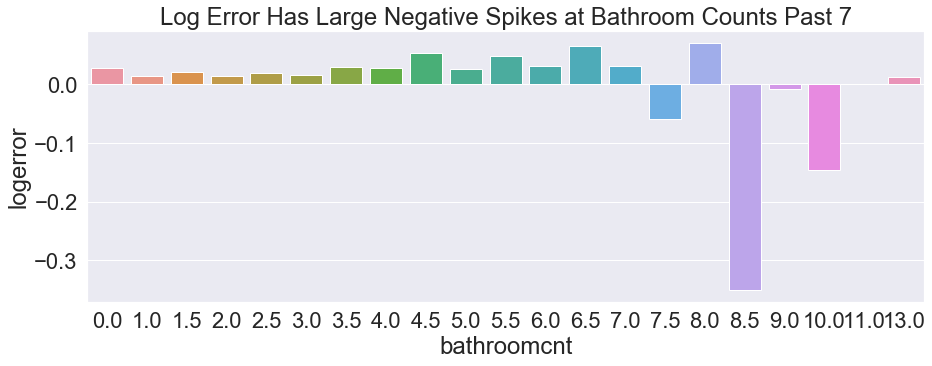

In [137]:
# setting figure size and text size
sns.set(rc = {'figure.figsize':(15,5)})
sns.set(font_scale = 2)

# plotting data, setting title
sns.barplot(x = 'bathroomcnt', y = 'logerror', data = zil, ci = None).set_title("Log Error Has Large Negative Spikes at Bathroom Counts Past 7")

#### Takeaways
- Log errors remain above 0 until bathroom count reaches 7.5, at which point there are several strong negative spikes
- There is a particularly large negative spike when bathroom count reaches 8.5

### Question 5: How does logerror fluctuate as calculatedfinishedsquarefeet increases?

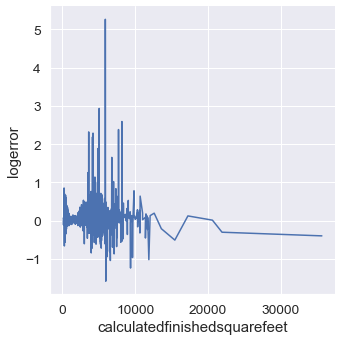

In [165]:
# setting text size and 
sns.set(font_scale = 1.25)

# plotting data, setting title
sns.relplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = zil, ci = None, kind="line")


- The smallest properties have log error values that approach 1 and -1 but do not meet it. 
- The log errors values taper until roughly 2,000 square feet when we see a great deal of spikes, both negative and positive
    -The spikes reach their most extreme values at roughly 5,000 square feet, then become more mild, but still spiky
- At around 9,000 square feet the remaining data points tend have negative spikes until around 17,000 square feet when the spikes virtually stop
- All together this means that the relationship between calculatedfinishedsquarefeet and logerror is probably the most chaotic relationship we've encountered amongst all of the relationships we've explored